In [1]:
## 📥 1. Import Libraries and Create Synthetic Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score, precision_recall_curve)

In [3]:
# Generate synthetic binary classification dataset
np.random.seed(42)
n_samples = 300
X1 = np.random.randn(n_samples)
X2 = np.random.randn(n_samples)
y = (X1 + X2 + np.random.randn(n_samples) * 0.5 > 0).astype(int)

In [4]:
df = pd.DataFrame({'Feature1': X1, 'Feature2': X2, 'Target': y})
df.head()

,Feature1,Feature2,Target
0,0.496714,-0.828995,1
1,-0.138264,-0.560181,0
2,0.647689,0.747294,1
3,1.523030,0.610370,1
4,-0.234153,-0.020902,0


In [5]:
## ⚙️ 2. Train-Test Split & Model Training

In [6]:
X = df[['Feature1', 'Feature2']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [8]:
## 🧮 3. Basic Metrics

In [9]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.75
Recall: 0.88
F1 Score: 0.81


In [11]:
## 📊 4. Confusion Matrix Visualization

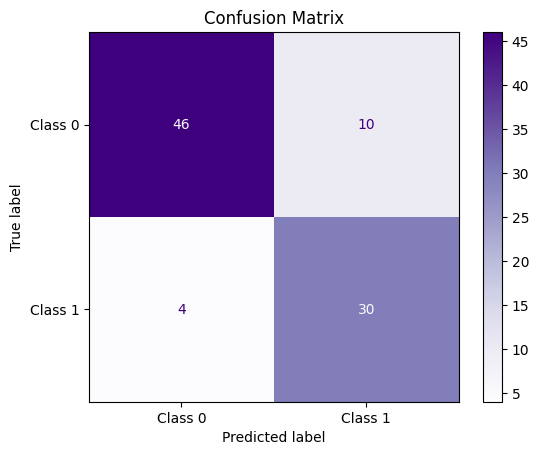

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

In [13]:
## 📈 5. ROC Curve & AUC

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

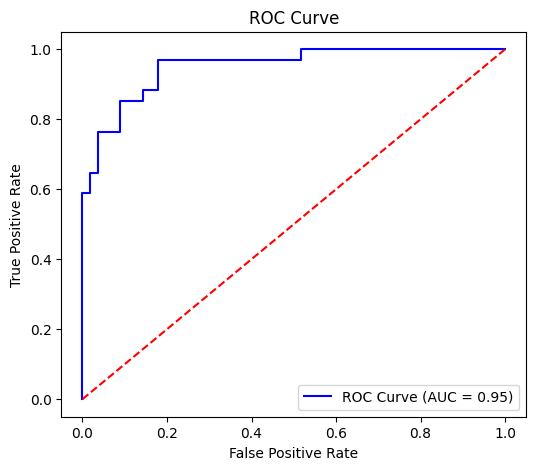

In [15]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
## 📉 6. Precision-Recall Tradeoff

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)


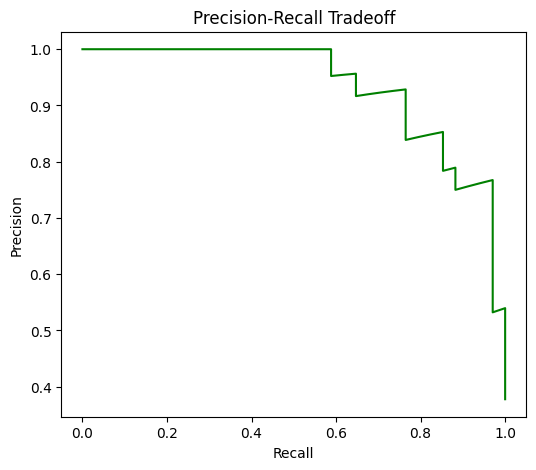

In [18]:
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Tradeoff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()